In [1]:
%matplotlib widget
from CG import *

## 14. The Nonlinear Conjugate Gradient Method <a id="14"></a>

CG can be used not only to find the minimum point of a quadratic form, but to minimize any continuous function $f(x)$ for which the gradient $f'$ can be computed. Applications include a variety of optimization problems, such as engineering design, neural net training, and nonlinear regression.

### 14.1. Outline of the Nonlinear Conjugate Gradient Method <a id="14.1"></a>

To derive nonlinear CG, there are three changes to the linear algorithm: the recursive formula for the residual cannot be used, it becomes more complicated to compute the step size $\alpha$, and there are several different choices for $\beta$.

In nonlinear CG, the residual is always set to the negation of the gradient; $r_{[i]} = -f'(x_{[i]})$. The search directions are computed by Gram-Schmidt conjugation of the residuals as with linear CG. Performing a line search along this search direction is much more difficult than in the linear case, and a variety of procedures can be used. As with the linear CG, a value of $\alpha_{[i]}$ that minimizes $f(x_{[i]} + \alpha_{[i]} d_{[i]})$ is found by ensuring that the gradient is orthogonal to the search direction. We can use any algorithm that finds the zeros of the expression $\left[f'(x_{[i]} + \alpha_{[i]} d_{[i]})\right]^T d_{[i]}$.

In linear CG, there are several equivalent expressions for the value of $\beta$. In nonlinear CG, these different expressions are no longer equivalent; researchers are still investigating the best choice. Two choices are the Fletcher-Reeves formula, which we used in linear CG for its ease of computation, and the Polak-Ribière formula:

\begin{align*}
\beta^{FR}_{[i+1]} = \frac{r^T_{[i+1]} r_{[i+1]}}{r^T_{[i]} r_{[i]}}, \quad \beta^{PR}_{[i+1]} = \frac{r^T_{[i+1]} (r_{[i+1]} - r_{[i]})}{r^T_{[i]} r_{[i]}}.
\end{align*}

The Fletcher-Reeves method converges if the starting point is sufficiently close to the desired minimum, whereas the Polak-Ribière method can, in rare cases, cycle infinitely without converging. However, Polak-Ribière often converges much more quickly.

Fortunately, convergence of the Polak-Ribière method can be guaranteed by choosing $\beta = \max{\{\beta^{PR}, 0\}}$. Using this value is equivalent to restarting CG if $\beta^{PR} < 0$. To *restart* CG is to forget the past search directions, and start CG anew in the direction of steepest descent.

Here is an outline of the nonlinear CG method:

\begin{align*}
d_{[0]} &= r_{[0]} = -f'(x_{[0]}), \\
\text{Find } \alpha_{[i]} & \text{ that minimizes } f(x_{[i]} + \alpha_{[i]} d_{[i]}), \\
x_{[i+1]} &= x_{[i]} + \alpha_{[i]} d_{[i]}, \\
r_{[x+i]} &= -f'(x_{[i+1]}), \\
\beta_{[i+1]} &= \frac{r^T_{[i+1]} r_{[i+1]}}{r^T_{[i]} r_{[i]}}, \quad \text{or} \\ 
\beta_{[i+1]} &= \max{\{\frac{r^T_{[i+1]} (r_{[i+1]} - r_{[i]})}{r^T_{[i]} r_{[i]}},0\}}, \\
d_{[i+1]} &= r_{[i+1]} + \beta_{[i+1]} d_{[i]}.
\end{align*}

Nonlinear CG comes with few of the convergence guarantees of linear CG. The less similar $f$ is to a quadratic function, the more quickly the search directions lose conjugacy. (It will become clear shortly that the term “conjugacy” still has some meaning in nonlinear CG.) Another problem is that a general function $f$ may have many local minima. CG is not guaranteed to converge to the global minimum, and may not even find a local minimum if $f$ has no lower bound.

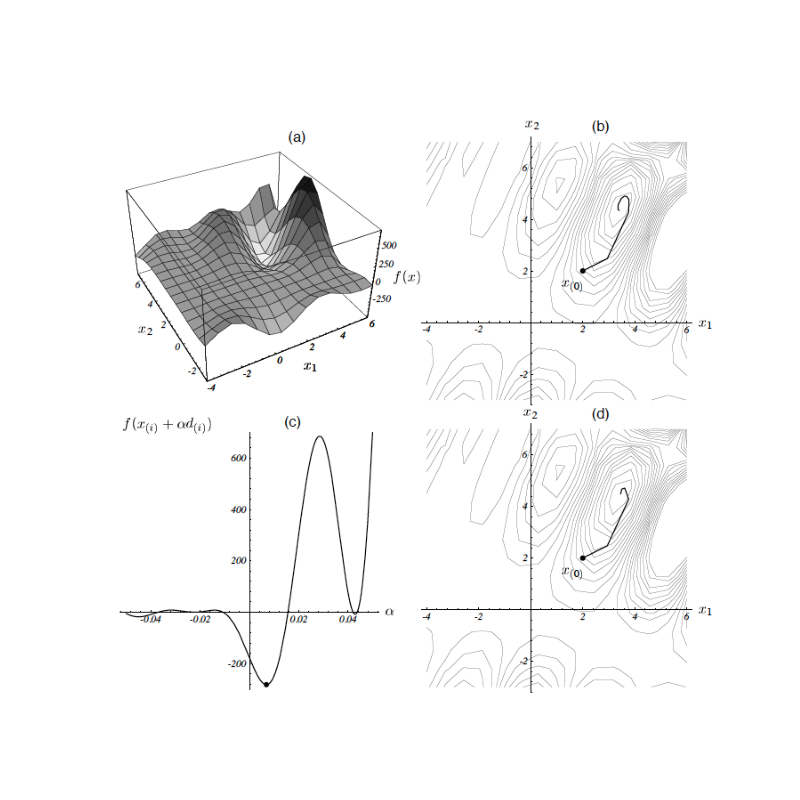

In [2]:
figload(37, (8,8))

<center>Figure 37: Convergence of the nonlinear Conjugate Gradient Method. (a) A complicated function with many local minima and maxima. (b) Convergence path of Fletcher-Reeves CG. Unlike linear CG, convergence does not occur in two steps. (c) Cross-section of the surface corresponding to the first line search. (d) Convergence path of Polak-Ribière CG.</center>

Figure 37 illustrates nonlinear CG. Figure 37(a) is a function with many local minima. Figure 37(b) demonstrates the convergence of nonlinear CG with the Fletcher-Reeves formula. In this example, CG is not nearly as effective as in the linear case; this function is deceptively difficult to minimize. Figure 37(c) shows a cross-section of the surface, corresponding to the first line search in Figure 37(b). Notice that there are several minima; the line search finds a value of $\alpha$ corresponding to a nearby minimum. Figure 37(d) shows the superior convergence of Polak-Ribière CG.

Because CG can only generate $n$ conjugate vectors in an $n$-dimensional space, it makes sense to restart CG every $n$ iterations, especially if $n$ is small. Figure 38 shows the effect when nonlinear CG is restarted every second iteration. (For this particular example, both the Fletcher-Reeves method and the Polak-Ribière method appear the same.)

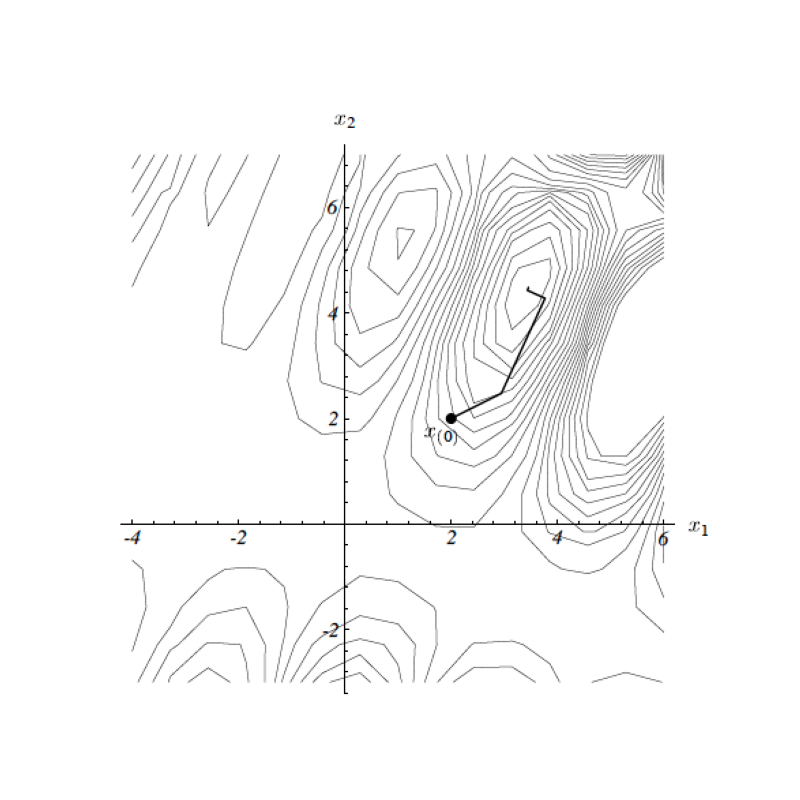

In [3]:
figload(38, (8,8))

<center>Figure 38: Nonlinear CG can be more effective with periodic restarts.</center>

### 14.2. General Line Search <a id="14.2"></a>

Depending on the value of $f'$, it might be possible to use a fast algorithm to find the zeros of $f'^T d$. For instance, if $f'$ is polynomial in $\alpha$, then an efficient algorithm for polynomial zero-finding can be used. However, we will only consider general-purpose algorithms.

Two iterative methods for zero-finding are the Newton-Raphson method and the Secant method. Both methods require that $f$ be twice continuously differentiable. Newton-Raphson also requires that it be possible to compute the second derivative of $f(x+\alpha d)$ with respect to $\alpha$.

The Newton-Raphson method relies on the Taylor series approximation

\begin{align}
f(x + \alpha d) &\approx f(x) + \alpha \left[ \frac{d}{d\alpha} f(x + \alpha d) \right]_{\alpha=0} + \frac{\alpha^2}{2} \left[ \frac{d^2}{d\alpha^2} f(x + \alpha d) \right]_{\alpha=0} \\
&= f(x) + \alpha \left[ f'(x) \right]^T d + \frac{\alpha^2}{2} d^T f''(x) d \nonumber\\
\frac{d}{d\alpha} &\approx \left[ f'(x) \right]^T d + \alpha d^T f''(x) d.
\end{align}

where $f''(x)$ is the *Hessian matrix*

$$
f''(x) = 
\begin{bmatrix}
    \frac{\partial^2 f}{\partial x_1 \partial x_1} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
    \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2 \partial x_2} &  & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
    \vdots &        & \ddots & \vdots \\
    \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_n \partial x_n} \\
  \end{bmatrix}.
$$

The function $f(x + \alpha d)$ is approximately minimized by setting Expression 57 to zero, giving

$$
\alpha = -\frac{f'^T d}{d^T f'' d}.
$$

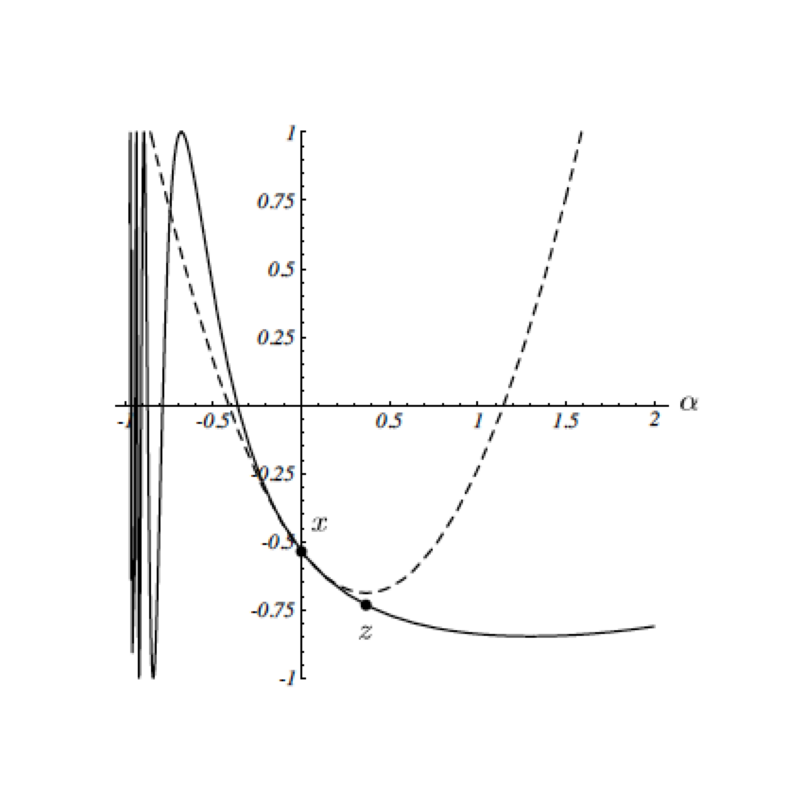

In [4]:
figload(39, (8,8))

<center>Figure 39: The Newton-Raphson method for minimizing a one-dimensional function (solid curve). Starting from the point $x$, calculate the first and second derivatives, and use them to construct a quadratic approximation to the function (dashed curve). A new point $z$ is chosen at the base of the parabola. This procedure is iterated until convergence is reached.</center>

The truncated Taylor series approximates $f(x + \alpha d)$ with a parabola; we step to the bottom of the parabola (see Figure 39). In fact, if $f$ is a quadratic form, then this parabolic approximation is exact, because $f''$ is just the familiar matrix $A$. In general, the search directions are *conjugate* if they are $f''$-orthogonal. The meaning of “conjugate” keeps changing, though, because $f''$ varies with $x$. The more quickly $f''$ varies with $x$, the more quickly the search directions lose conjugacy. On the other hand, the closer $x_{[i]}$ is to the solution, the less $f''$ varies from iteration to iteration. The closer the starting point is to the solution, the more similar the convergence of nonlinear CG is to that of linear CG.

To perform an exact line search of a non-quadratic function, repeated steps must be taken along the line until $f'^T d$ is zero; hence, one CG iteration may include many Newton-Raphson iterations. The values of $f'^T d$ and $d^T f'' d$ must be evaluated at each step. These evaluations may be inexpensive if $d^T f'' d$ can be analytically simplified, but if the full matrix $f''$ must be evaluated repeatedly, the algorithm is prohibitively slow. For some applications, it is possible to circumvent this problem by performing an approximate line search that uses only the diagonal elements of $f''$. Of course, there are functions for which it is not possible to evaluate $f''$ at all.

To perform an exact line search without computing $f''$, the Secant method approximates the second derivative of $f(x + \alpha d)$ by evaluating the first derivative at the distinct points $\alpha=0$ and $\alpha = \sigma$, where $\sigma$ is an arbitrary small nonzero number:

\begin{align}
\frac{d^2}{d\alpha^2}f(x + \alpha d) &\approx \frac{\left[ \frac{d}{d\alpha}f(x + \alpha d) \right]_{\alpha=\sigma} - \left[ \frac{d}{d\alpha}f(x + \alpha d) \right]_{\alpha=0}}{\sigma} \qquad \sigma \neq 0 \nonumber\\
&= \frac{\left[ f'(x + \alpha d) \right]^T d - \left[ f'(x) \right]^T d}{\sigma},
\end{align}

which becomes a better approximation to the second derivative as $\alpha$ and $\sigma$ approach zero. If we substitute
Expression 58 for the third term of the Taylor expansion (Equation 56), we have

$$
\frac{d}{d\alpha} f(x + \alpha d) \approx \left[ f'(x) \right]^T d + \frac{\alpha}{\sigma} \left\{ \left[ f'(x + \sigma d) \right]^T d - \left[ f'(x) \right]^T d \right\}.
$$

Minimize $f(x + \alpha d)$ by setting its derivative to zero:

\begin{equation}
\alpha = -\sigma \frac{\left[ f'(x) \right]^T d}{\left[ f'(x + \sigma d) \right]^T d - \left[ f'(x) \right]^T d}.
\end{equation}

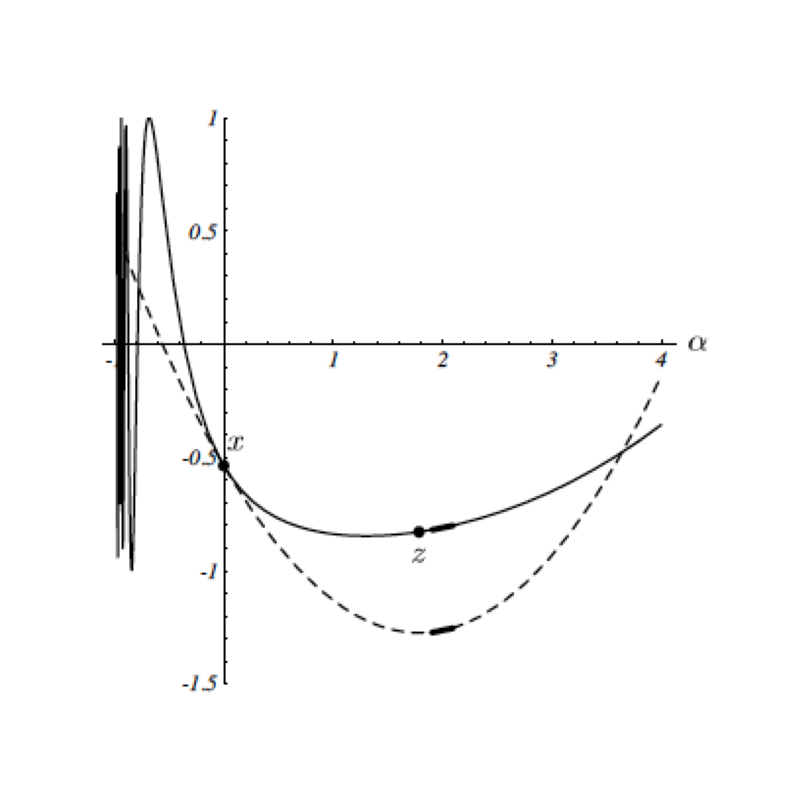

In [5]:
figload(40, (8,8))

<center>Figure 40: The Secant method for minimizing a one-dimensional function (solid curve). Starting from the point $x$, calculate the first derivatives at two different points (here, $\alpha=0$ and $\alpha=2$), and use them to construct a quadratic approximation to the function (dashed curve). Notice that both curves have the same slope at $\alpha=0$, and also at $\alpha=2$. As in the Newton-Raphson method, a new point $z$ is chosen at the base of the parabola, and the procedure is iterated until convergence.</center>

Like Newton-Raphson, the Secant method also approximates $f(x + \alpha d)$ with a parabola, but instead of choosing the parabola by finding the first and second derivative at a point, it finds the first derivative at two different points (see Figure 40). Typically, we will choose an arbitrary $\sigma$ on the first Secant method iteration; on subsequent iterations we will choose $x + \sigma d$ to be the value of $x$ from the previous Secant method iteration. In other words, if we let $\alpha_{[i]}$ denote the value of $\alpha$ calculated during Secant iteration $i$, then $\sigma[i+1] = -\alpha_{[i]}$.

Both the Newton-Raphson and Secant methods should be terminated when $x$ is reasonably close to the exact solution. Demanding too little precision could cause a failure of convergence, but demanding too fine precision makes the computation unnecessarily slow and gains nothing, because conjugacy will break down quickly anyway if $f''(x)$ varies much with $x$. Therefore, a quick but inexact line search is often the better policy (for instance, use only a fixed number of Newton-Raphson or Secant method iterations). Unfortunately, inexact line search may lead to the construction of a search direction that is not a descent direction. A common solution is to test for this eventuality (is $r^Td$ nonpositive?), and restart CG if necessary by setting $d = r$.

A bigger problem with both methods is that they cannot distinguish minima from maxima. The result of nonlinear CG generally depends strongly on the starting point, and if CG with the Newton-Raphson or Secant method starts near a local maximum, it is likely to converge to that point.

Each method has its own advantages. The Newton-Raphson method has a better convergence rate, and is to be preferred if $d^T f'' d$ can be calculated (or well approximated) quickly (i.e., in $\mathcal{O}(n)$ time). The Secant method only requires first derivatives of $f$, but its success may depend on a good choice of the parameter $\sigma$. It is easy to derive a variety of other methods as well. For instance, by sampling $f$ at three different points, it is possible to generate a parabola that approximates $f(x + \alpha d)$ without the need to calculate even a first derivative of $f$.

### 14.3. Preconditioning <a id="14.3"></a>

Nonlinear CG can be preconditioned by choosing a preconditioner $M$ that approximates $f''$ and has the property that $M^{-1}r$ is easy to compute. In linear CG, the preconditioner attempts to transform the quadratic form so that it is similar to a sphere; a nonlinear CG preconditioner performs this transformation for a region near $x_{[i]}$.

Even when it is too expensive to compute the full Hessian $f''$, it is often reasonable to compute its diagonal for use as a preconditioner. However, be forewarned that if $x$ is sufficiently far from a local minimum, the diagonal elements of the Hessian may not all be positive. A preconditioner should be positive-definite, so nonpositive diagonal elements cannot be allowed. A conservative solution is to not precondition (set $M=I$) when the Hessian cannot be guaranteed to be positive-definite. Figure 41 demonstrates the convergence of diagonally preconditioned nonlinear CG, with the Polak-Ribière formula, on the same function illustrated in Figure 37. Here, I have cheated by using the diagonal of $f''$ at the solution point $x$ to precondition every iteration.

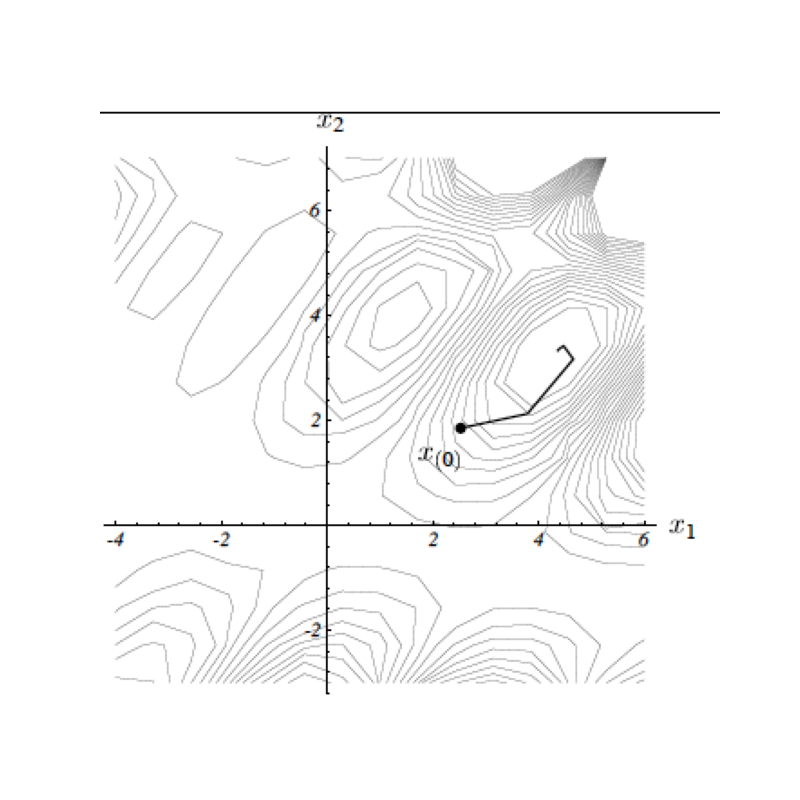

In [6]:
figload(41, (8,8))

<center>Figure 41: The preconditioned nonlinear Conjugate Gradient Method, using the Polak-Ribière formula and a diagonal preconditioner. The space has been “stretched” to show the improvement in circularity of the contour lines around the minimum.</center>

Next: [A. Notes and References](CGA.ipynb)